In [2]:

%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.199 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
Setup complete ✅ (2 CPUs, 15.6 GB RAM, 5016.7/8062.4 GB disk)


In [3]:
# Run inference on an image with YOLOv8n
!yolo predict model=yolov8n.pt source='https://ultralytics.com/images/zidane.jpg'

100%|███████████████████████████████████████| 6.23M/6.23M [00:00<00:00, 163MB/s]
Ultralytics YOLOv8.0.199 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

100%|████████████████████████████████████████| 165k/165k [00:00<00:00, 13.5MB/s]
image 1/1 /kaggle/working/zidane.jpg: 384x640 2 persons, 1 tie, 59.0ms
Speed: 9.1ms preprocess, 59.0ms inference, 20.8ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [4]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8n.yaml')  # build a new model from scratch
# model = YOLO('yolov8n.pt')  # load a pretrained model (recommended for training)


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

In [5]:
!pwd

/kaggle/working


gallica_json = "/kaggle/input/dataset/envoi1/dataset/gallica_dataset-at-05-28-2023-23-52-13.json"

In [6]:
gallica_json = "/kaggle/input/galica/galica/gallicaimages_set1.json"

In [7]:
import json

def print_structure(data, indent = 0):
    if isinstance(data, dict):
        for key, value in data.items():
            print(' ' * indent + str(key))
            print_structure(value, indent + 2)
    elif isinstance(data, list):
        if data:  # add a check if the list is not empty
            if isinstance(data[0], dict) or isinstance(data[0], list):
                print(' ' * indent + 'list:')
                print_structure(data[0], indent + 2)
            else:
                print(' ' * indent + 'list of ' + str(type(data[0])))
        else:  # handle empty list case
            print(' ' * indent + 'Empty list')

In [8]:
import os
with open(gallica_json, "r") as read_file:
    data = json.load(read_file)
    print_structure(data)

info
  description
  contribuor
    list of <class 'str'>
documents
  list:
    ark
    metadata
      title
        list of <class 'str'>
      creator
        list of <class 'str'>
      subject
        list of <class 'str'>
      description
        list of <class 'str'>
      publisher
        list of <class 'str'>
      contributor
        Empty list
      relation
        list of <class 'str'>
      coverage
        Empty list
      identifier
        list of <class 'str'>
      rights
        list of <class 'str'>
      type
        list of <class 'str'>
      language
        list of <class 'str'>
      date
        list of <class 'str'>
      format
        list of <class 'str'>
      source
        list of <class 'str'>
images
  list:
    ark
    id
    width
    height
    iiif
annotations
  list:
    id
    result
      list:
        area
        bbox
          x
          y
          width
          height
          rotation
        label
          list of <class 'str'>
  

!mkdir dataset
!mkdir dataset/labels
!cp -r /kaggle/input/dataset/envoi1/dataset/IMG-202305291935 /kaggle/working/dataset/images

In [9]:
!mkdir dataset
!mkdir dataset/labels
!cp -r /kaggle/input/galica/image /kaggle/working/dataset/images

In [10]:
import glob

files = glob.glob('/kaggle/working/dataset/labels/*')
for f in files:
    os.remove(f)

In [11]:
class_map = {
    'nothing': 0,
    'tampon': 1,
    'écriture manuscrite': 2,
    'écriture typographique': 3,
    'photographie': 4,
    'estampe': 5,
    'décoration': 6,
    'timbre': 7,
    'dessin': 8,
    'blanche': 9,
    'schema': 10,
    'dessin-photomeca': 11,
    'photomeca': 12,
    'écriture musicale': 13
}

In [12]:
for i in range(len(data['images'])):
    img_height = data['images'][i]['height']
    img_width = data['images'][i]['width']
    img_id = data['images'][i]['id']
    #print(data['images'][i]['id'])
    #print(data['annotations'][i]['id'])
    pathtxt = '/kaggle/working/dataset/labels/'+ str(data['images'][i]['id'])
    with open(pathtxt + '.txt', 'w') as f: 
        for j in range(len(data['annotations'][i]['result'])):
            
            bbox = data['annotations'][i]['result'][j]['bbox']
            #print(data['annotations'][i]['result'][j]['label'])
            if data['annotations'][i]['result'][j]['label'] == 0:
                continue
            label = data['annotations'][i]['result'][j]['label'][0]
            # Trouver l'ID de classe YOLO correspondant
            yolov8_class_id = class_map[label]
            
            # Convertir le format de la bounding box
            x_center = (bbox['x'] + bbox['width'] / 2) /100
            y_center = (bbox['y'] + bbox['height'] / 2) /100
            width = bbox['width'] /100
            height = bbox['height'] /100
            #print(x_center)
            #print(width)
            
            
            #print(f"{yolov8_class_id} {x_center} {y_center} {width} {height}\n")
            f.write(f"{yolov8_class_id} {x_center} {y_center} {width} {height}\n")
            

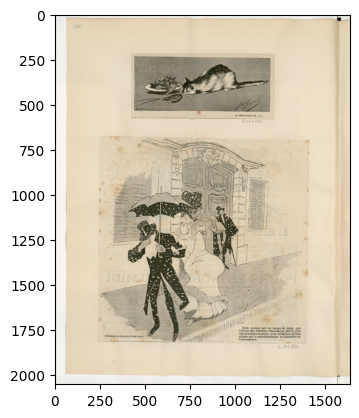

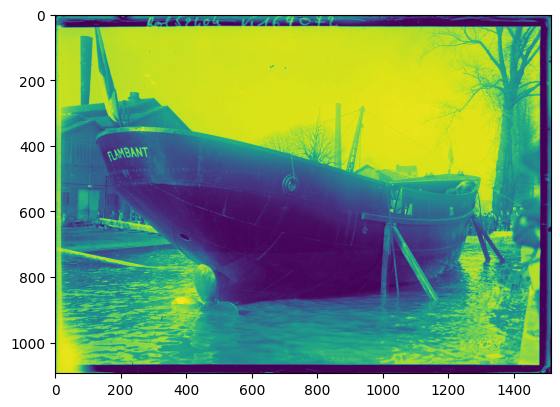

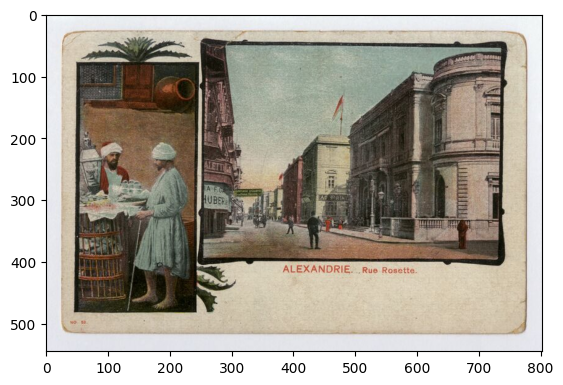

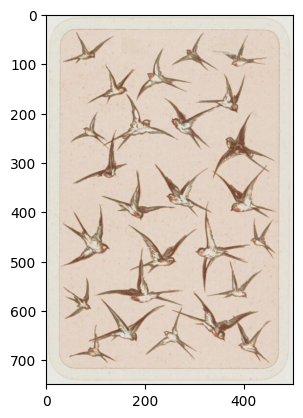

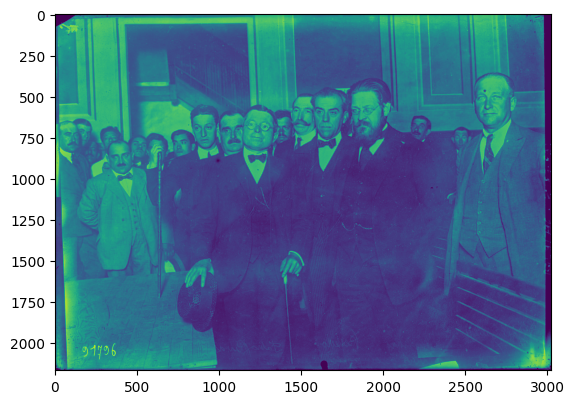

In [13]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random
import os

# Reverse map YOLO class IDs back to labels
reverse_class_map = {v: k for k, v in class_map.items()}

# Select random images to visualize
random_indices = random.sample(range(len(data['images'])), 5)  # Display 5 random images

desired_label = 'écriture musicale'

for i in random_indices:
    #img_id = data['images'][i]['id']
    img_height = data['images'][i]['height']
    img_width = data['images'][i]['width']
    image_path = f'/kaggle/working/dataset/images/{img_id}.jpg'  # Replace with your actual path
    
    # Load the image
    img = plt.imread(image_path)
    
    # Load the label file
    label_path = f'/kaggle/working/dataset/labels/{img_id}.txt'
    with open(label_path, 'r') as f:
        lines = f.readlines()
    
    fig, ax = plt.subplots(1)
    ax.imshow(img)
    
    for line in lines:
        yolov8_class_id, x_center, y_center, width, height = map(float, line.strip().split())
        
        # Convert YOLO bbox format to xmin, ymin, xmax, ymax
        x1 = int((x_center - width / 2) * img_width)
        y1 = int((y_center - height / 2) * img_height)
        box_width = int(width * img_width)
        box_height = int(height * img_height)
        label = reverse_class_map[int(yolov8_class_id)]
        #if label != desired_label:
            #continue
        # Draw the bounding box
        rect = patches.Rectangle((x1, y1), box_width, box_height, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        
        # Add the label
        label = reverse_class_map[int(yolov8_class_id)]
        plt.text(x1, y1 - 30, label, color='white', backgroundcolor='red')
    
    plt.show()

In [14]:
import random

def split_dataset(image_dir, label_dir, train_ratio=0.7, val_ratio=0.2):
    # Liste des fichiers d'image et de label
    image_files = [f for f in os.listdir(image_dir) if f.endswith('.jpg')]
    label_files = [f.replace('.jpg', '.txt') for f in image_files]

    # Mélanger les fichiers
    combined = list(zip(image_files, label_files))
    random.shuffle(combined)
    image_files, label_files = zip(*combined)

    # Calculer les indices de séparation
    total_files = len(image_files)
    train_idx = int(total_files * train_ratio)
    val_idx = int(total_files * (train_ratio + val_ratio))

    # Diviser les fichiers en train, val et test
    train_images = image_files[:train_idx]
    val_images = image_files[train_idx:val_idx]
    test_images = image_files[val_idx:]

    train_labels = label_files[:train_idx]
    val_labels = label_files[train_idx:val_idx]
    test_labels = label_files[val_idx:]

    # Créer les dossiers s'ils n'existent pas
    for folder_name in ['train', 'val', 'test']:
        os.makedirs(os.path.join(image_dir, folder_name), exist_ok=True)
        os.makedirs(os.path.join(label_dir, folder_name), exist_ok=True)

    # Déplacer les fichiers dans les dossiers correspondants
    for img, lbl, folder_name in zip([train_images, val_images, test_images],
                                     [train_labels, val_labels, test_labels],
                                     ['train', 'val', 'test']):
        for img_file, lbl_file in zip(img, lbl):
            os.rename(os.path.join(image_dir, img_file), os.path.join(image_dir, folder_name, img_file))
            os.rename(os.path.join(label_dir, lbl_file), os.path.join(label_dir, folder_name, lbl_file))

# Exemple d'utilisation
image_dir = "/kaggle/working/dataset/images"
label_dir = "/kaggle/working/dataset/labels"
split_dataset(image_dir, label_dir)

In [ ]:
category_dict = class_map
def split_data(json_file, category_dict, image_dir, split='train'):
    # Load json file
    """
        Divide original dataset in train , val , test
    """
    with open(json_file) as f:
        data = json.load(f)

    classes_count = np.zeros(len(category_dict))
    # Convert to Detectron2 format
    dataset_dicts = get_my_dataset_dicts(json_file, category_dict, image_dir)
    print(len(dataset_dicts))
    
    #get total number of each classes
    for data in dataset_dicts:        
        for annotation in data["annotations"]:
            classes_count[annotation["category_id"]] += 1
    
    data_train = []
    data_val = []
    data_test = []
    data_lost = []
    nb_image = 0
    count = np.zeros(len(category_dict))
    classes_count_sorted = np.argsort(classes_count)
    for data in dataset_dicts:
        isLost = True
        for annotation in data["annotations"]:
            v = False
            for i in range(len(category_dict)):
                if count[annotation["category_id"]] < classes_count[classes_count_sorted[i]]*0.83:
                    data_train.append(data)
                    for annotation in data["annotations"]:
                        count[annotation["category_id"]] += 1
                    nb_image+=1
                    v=True
                    break
                elif count[annotation["category_id"]] < classes_count[classes_count_sorted[i]]*0.95:
                    data_val.append(data)
                    for annotation in data["annotations"]:
                        count[annotation["category_id"]] += 1
                    nb_image+=1
                    v=True
                    break
                elif count[annotation["category_id"]] < classes_count[classes_count_sorted[i]]:
                    data_test.append(data)
                    for annotation in data["annotations"]:
                        count[annotation["category_id"]] += 1
                    nb_image+=1
                    v=True
                    break
            if v:
                isLost = False
                break
        if isLost:
            data_lost.append(data)
            
    #append lost data to test data
    for data in data_lost:
        data_test.append(data)
                        
    print("count: ", count)
    print("classes_count: ", classes_count)
    print("nb_image: ", nb_image)
    print("data_lost", len(data_lost))
    
    return data_train, data_val, data_test

In [15]:
!cp /kaggle/input/envoie1/dataset.yaml /kaggle/working

In [16]:
#!rm /kaggle/working/dataset.yaml

In [17]:
results = model.train(data='/kaggle/working/dataset.yaml', epochs=10, imgsz=320)

Ultralytics YOLOv8.0.199 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/kaggle/working/dataset.yaml, epochs=10, patience=50, batch=16, imgsz=320, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=F

In [18]:
!yolo predict model=/kaggle/working/runs/detect/train/weights/best.pt source=/kaggle/input/galica/image

Ultralytics YOLOv8.0.199 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
YOLOv8n summary (fused): 168 layers, 3008378 parameters, 0 gradients, 8.1 GFLOPs

image 1/2738 /kaggle/input/galica/image/0002c59a-ec82-44bd-9a04-a1c556f0800c.jpg: 320x256 1 photographie, 44.8ms
image 2/2738 /kaggle/input/galica/image/0034f2a4-0185-40ba-890e-3b66925f6a90.jpg: 256x320 1 photographie, 52.9ms
image 3/2738 /kaggle/input/galica/image/003cdeba-24c3-46de-a288-afb0cb2b48de.jpg: 320x256 1 estampe, 6.1ms
image 4/2738 /kaggle/input/galica/image/00551472-c57d-4097-8c28-aba15073fd75.jpg: 256x320 1 photographie, 6.3ms
image 5/2738 /kaggle/input/galica/image/0059db04-d433-4a13-93e5-f0a5f4ef7970.jpg: 320x256 1 photographie, 9.9ms
image 6/2738 /kaggle/input/galica/image/005c23c0-8b19-4647-8717-b01760087598.jpg: 256x320 1 photographie, 6.2ms
image 7/2738 /kaggle/input/galica/image/009e7344-5820-4dc5-a126-dbad8a42ce0c.jpg: 256x320 1 photographie, 6.3ms
image 8/2738 /kaggle/input/galica/image/00a

In [19]:
import zipfile
import os
from IPython.core.display import display, HTML

# Zip the '/kaggle/working/runs' folder
zip_file_path = '/kaggle/working/newruns.zip'
folder_to_zip = '/kaggle/working/runs'

# Create a Zip file
with zipfile.ZipFile(zip_file_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
    for root, dirs, files in os.walk(folder_to_zip):
        for file in files:
            # Construct the file path
            full_path = os.path.join(root, file)
            # Write to zip file, considering relative paths
            zipf.write(full_path, os.path.relpath(full_path, folder_to_zip))

# Create a download link
display(HTML(f'<a href="{zip_file_path}" download>Click here to download runs.zip</a>'))

/tmp/ipykernel_28/485134259.py:3: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [20]:
'''
import cv2
import os
import matplotlib.pyplot as plt

def display_images_with_labels(image_folder, label_folder, num_images=5):
    # Liste des fichiers d'image et de label
    image_files = [f for f in os.listdir(image_folder) if f.endswith('.jpg')]
    
    # Afficher un nombre limité d'images
    for i, img_file in enumerate(image_files[:num_images]):
        # Charger l'image
        img_path = os.path.join(image_folder, img_file)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Charger les labels associés
        label_file = img_file.replace('.jpg', '.txt')
        label_path = os.path.join(label_folder, label_file)
        
        with open(label_path, 'r') as f:
            for line in f:
                cls, x_center, y_center, width, height = map(float, line.strip().split())
                x1 = int((x_center - width / 2) * img.shape[1])
                y1 = int((y_center - height / 2) * img.shape[0])
                x2 = int((x_center + width / 2) * img.shape[1])
                y2 = int((y_center + height / 2) * img.shape[0])
                
                # Dessiner la boîte englobante
                cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
        
        # Afficher l'image
        plt.figure()
        plt.imshow(img)
        plt.title(f"Image {i+1}")
        plt.axis('off')
        plt.show()

# Exemple d'utilisation
image_folder = '/kaggle/working/dataset/images/test'  # Remplacez par le chemin réel vers vos images
label_folder = '/kaggle/working/dataset/labels/test'  # Remplacez par le chemin réel vers vos labels
display_images_with_labels(image_folder, label_folder)
'''

'\nimport cv2\nimport os\nimport matplotlib.pyplot as plt\n\ndef display_images_with_labels(image_folder, label_folder, num_images=5):\n    # Liste des fichiers d\'image et de label\n    image_files = [f for f in os.listdir(image_folder) if f.endswith(\'.jpg\')]\n    \n    # Afficher un nombre limité d\'images\n    for i, img_file in enumerate(image_files[:num_images]):\n        # Charger l\'image\n        img_path = os.path.join(image_folder, img_file)\n        img = cv2.imread(img_path)\n        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)\n\n        # Charger les labels associés\n        label_file = img_file.replace(\'.jpg\', \'.txt\')\n        label_path = os.path.join(label_folder, label_file)\n        \n        with open(label_path, \'r\') as f:\n            for line in f:\n                cls, x_center, y_center, width, height = map(float, line.strip().split())\n                x1 = int((x_center - width / 2) * img.shape[1])\n                y1 = int((y_center - height / 2) * img